In [103]:
%store -r water

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.231302,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.05786,6.635246,344.281104,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.54173,9.275884,334.852757,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [106]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.079070,196.427436,21799.054835,7.122979,333.915355,425.796534,14.284943,66.455802,3.966918,0.390110
std,1.373280,30.104019,8265.600775,1.470491,33.998383,79.691222,3.214248,15.120537,0.763322,0.487849
min,3.148712,117.791230,320.942611,3.181183,229.575561,201.619737,5.362371,23.792950,1.872573,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,316.571141,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.060796,196.967627,20927.833605,7.130299,333.836906,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.538503,481.792305,16.557652,76.666609,4.500320,1.000000
max,10.947473,275.886513,44652.363870,11.086526,437.647162,652.537592,23.234326,108.849568,6.083772,1.000000


In [107]:
#Let's first compare water that is potable and water that is not
potable = water[water['Potability'] == 1]
not_pot = water[water['Potability'] == 0]

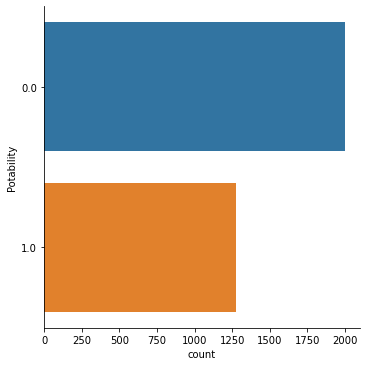

In [108]:
#It's about a 60 / 40 split between not potable and potable 
sns.catplot(data = water, y = 'Potability', kind = 'count')

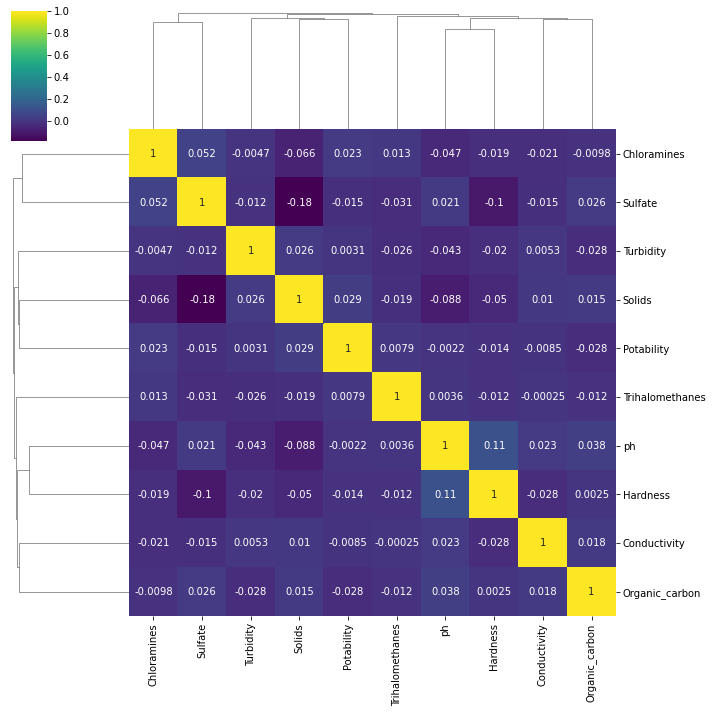

In [109]:
#Now let's turn to a clustermap 
sns.color_palette("viridis", as_cmap=True)
sns.clustermap(water.corr(),cmap="viridis",annot=True)

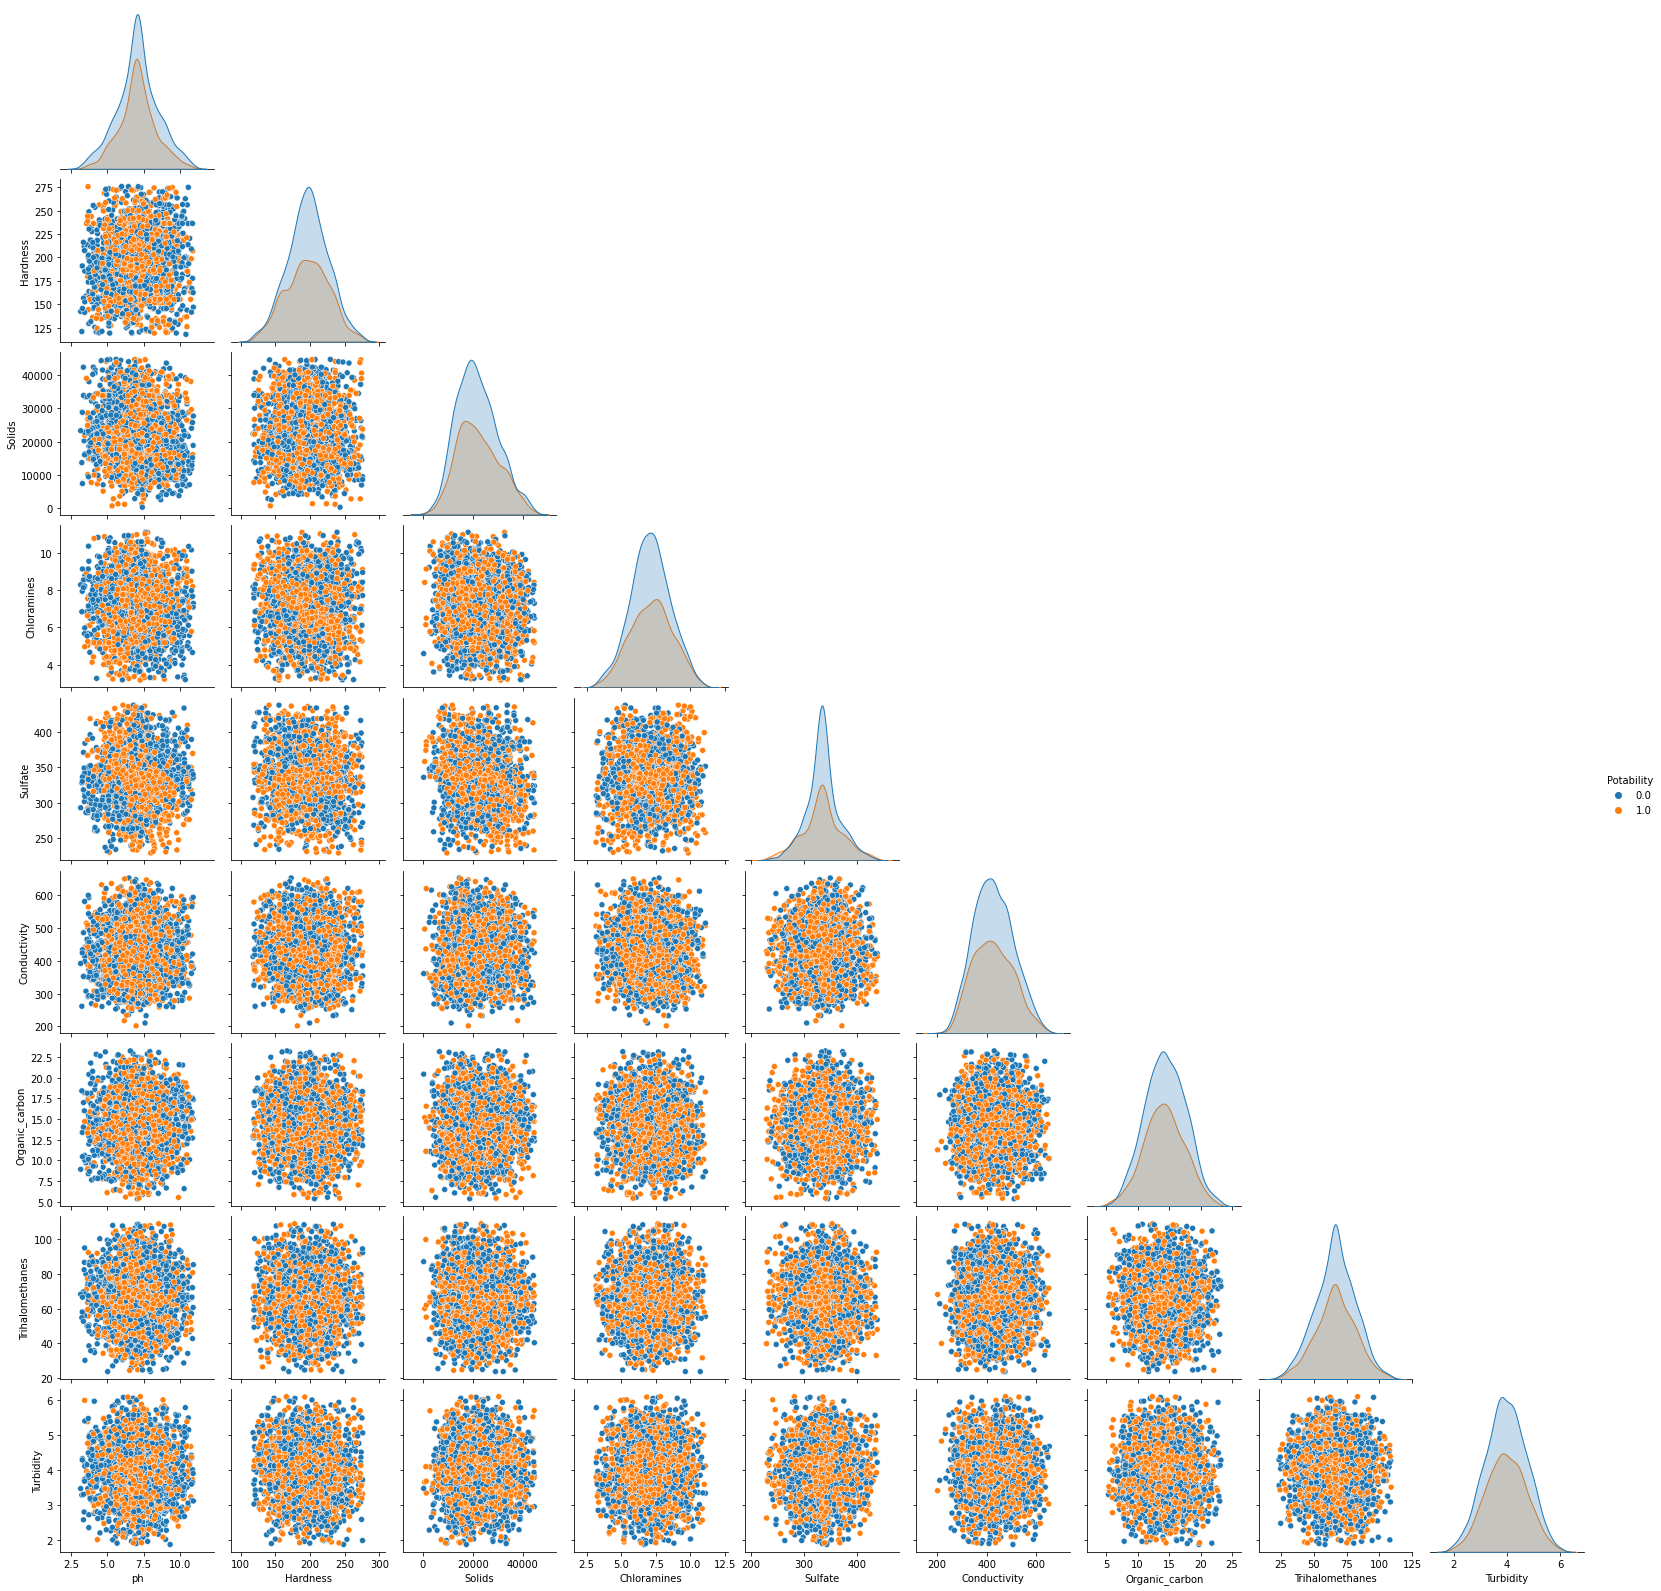

In [110]:
#Few strong correlations between features (especially not between the target (potability) and our features).
#Maybe we'll generate some insights from a pairplot

sns.pairplot(water, hue = 'Potability', corner = True)

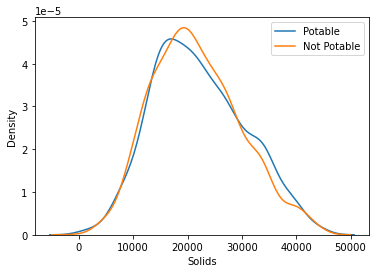

In [111]:
#We can see some eye-test variation between the distributions of features for potable and not potable. There is a notable
#leftward skew in the Solids feature (not potable). Let's look more closely at that. 
solids_p, solids_np = potable['Solids'], not_pot['Solids']
sns.kdeplot(solids_p)
sns.kdeplot(solids_np)
plt.legend(labels = ["Potable", "Not Potable"])
plt.show()

Text(9.5, 175, 'Not Safe')

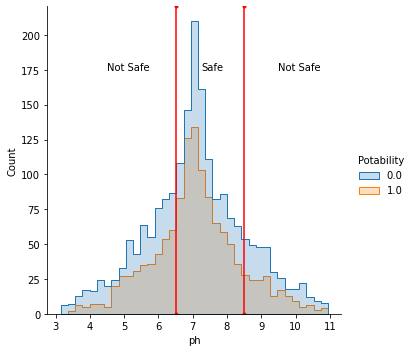

In [112]:
#Now time to explore the distributions based on the "safe" content level for various features, starting with ph
#the safe range is 6.5 - 8.5
sns.displot(x='ph', data=water, hue='Potability',element='step')
plt.axvline(x=6.5, marker='.',c = 'r')
plt.axvline(x=8.5, marker='.', c = 'r')
plt.annotate('Safe', xy = (7.25,175))
plt.annotate('Not Safe',xy=(4.5,175))
plt.annotate('Not Safe',xy=(9.5,175))

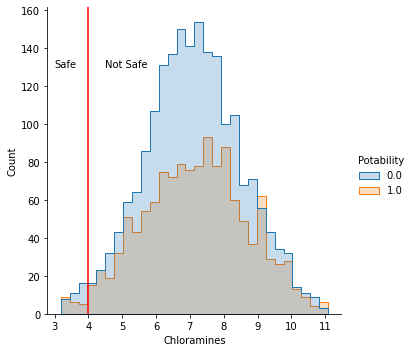

In [113]:
#In Chloramine, the safe level is up to 4 ppm.
sns.displot(x='Chloramines',data=water,hue='Potability',element='step')
plt.axvline(x=4.0,c='r')
plt.annotate('Safe', xy=(3,130))
plt.annotate('Not Safe', xy=(4.5,130))
plt.show()

In [114]:
#Surprisingly, only about 2% of potable values are in the 'safe range.' Even more surprising, the potable observations seem to 
#have a wider distribution than the non-potable observations.
print(np.percentile(potable['Chloramines'],2))

4.09794477004


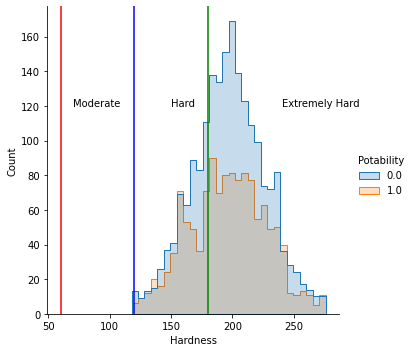

In [115]:
#Next, Hardness. Hardness comes in tiers: 0 - 60 is soft; 61 - 120 is moderately
#hard; 121 - 180 is hard; greater than 180 is very hard (source: U.S. Geological
#Survey)
sns.displot(x='Hardness', data = water, hue = 'Potability', element = 'step')
plt.axvline(x=60, c = 'r')
plt.axvline(x=120, c = 'b')
plt.axvline(x=180, c = 'g')
plt.annotate('Moderate', xy = (70,120))
plt.annotate('Hard', xy = (150,120))
plt.annotate('Extremely Hard', xy = (240,120))
plt.show()

In [116]:
#Well. It seems that we have a dataset of extremes. It will be interesting to see what modeling brings.

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
Potability
